In [1]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : 7.6.5
jupyter_client   : 7.4.8
jupyter_core     : 4.11.1
jupyter_server   : 1.23.4
jupyterlab       : 3.5.2
nbclient         : 0.5.13
nbconvert        : 6.5.3
nbformat         : 5.7.0
notebook         : 6.5.2
qtconsole        : 5.4.0
traitlets        : 5.7.1


In [2]:
pwd

'D:\\Documents\\CU Boulder\\5506 Data Mining Project'

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import requests
import json, os, datetime
import csv
import datetime
import calendar
from pandas import DataFrame
from pprint import pprint
import seaborn as sns
from colorama import Fore, Back, Style
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
import os
import copy
import dabl
from imblearn.combine import SMOTEENN
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
nasa = pd.read_csv("nasa.csv")
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


**We FIRST check to see if there are any missing values and the data types for each feature, this can be completed in below step:**

In [5]:
for col in nasa.columns:
    print("Colum Length: " + " " + col + "=", len(nasa[col]))

Colum Length:  Neo Reference ID= 4687
Colum Length:  Name= 4687
Colum Length:  Absolute Magnitude= 4687
Colum Length:  Est Dia in KM(min)= 4687
Colum Length:  Est Dia in KM(max)= 4687
Colum Length:  Est Dia in M(min)= 4687
Colum Length:  Est Dia in M(max)= 4687
Colum Length:  Est Dia in Miles(min)= 4687
Colum Length:  Est Dia in Miles(max)= 4687
Colum Length:  Est Dia in Feet(min)= 4687
Colum Length:  Est Dia in Feet(max)= 4687
Colum Length:  Close Approach Date= 4687
Colum Length:  Epoch Date Close Approach= 4687
Colum Length:  Relative Velocity km per sec= 4687
Colum Length:  Relative Velocity km per hr= 4687
Colum Length:  Miles per hour= 4687
Colum Length:  Miss Dist.(Astronomical)= 4687
Colum Length:  Miss Dist.(lunar)= 4687
Colum Length:  Miss Dist.(kilometers)= 4687
Colum Length:  Miss Dist.(miles)= 4687
Colum Length:  Orbiting Body= 4687
Colum Length:  Orbit ID= 4687
Colum Length:  Orbit Determination Date= 4687
Colum Length:  Orbit Uncertainity= 4687
Colum Length:  Minimum Orb

In [6]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

False    3932
True      755
Name: Hazardous, dtype: int64




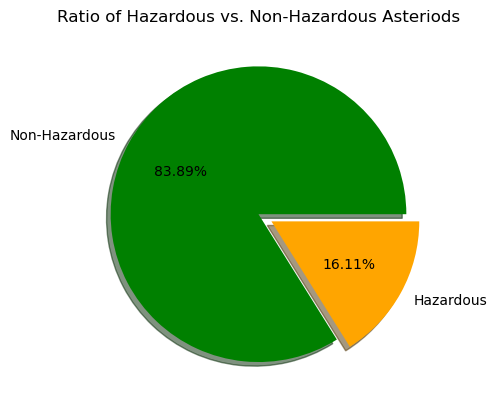

In [7]:
# Check the ratio of Hazardous vs. Non-Hazerdous Asteroids
print(nasa['Hazardous'].value_counts())
print('\n')
lab = 'Non-Hazardous', 'Hazardous'
explode =(0,0.1)
plt.pie(nasa['Hazardous'].value_counts(), explode = explode, labels = lab, colors=['green', 'orange'], autopct='%1.2f%%', shadow=True,
       counterclock=True)
plt.title('Ratio of Hazardous vs. Non-Hazardous Asteriods')
plt.show()

#Reference:
#1.https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
#2.https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

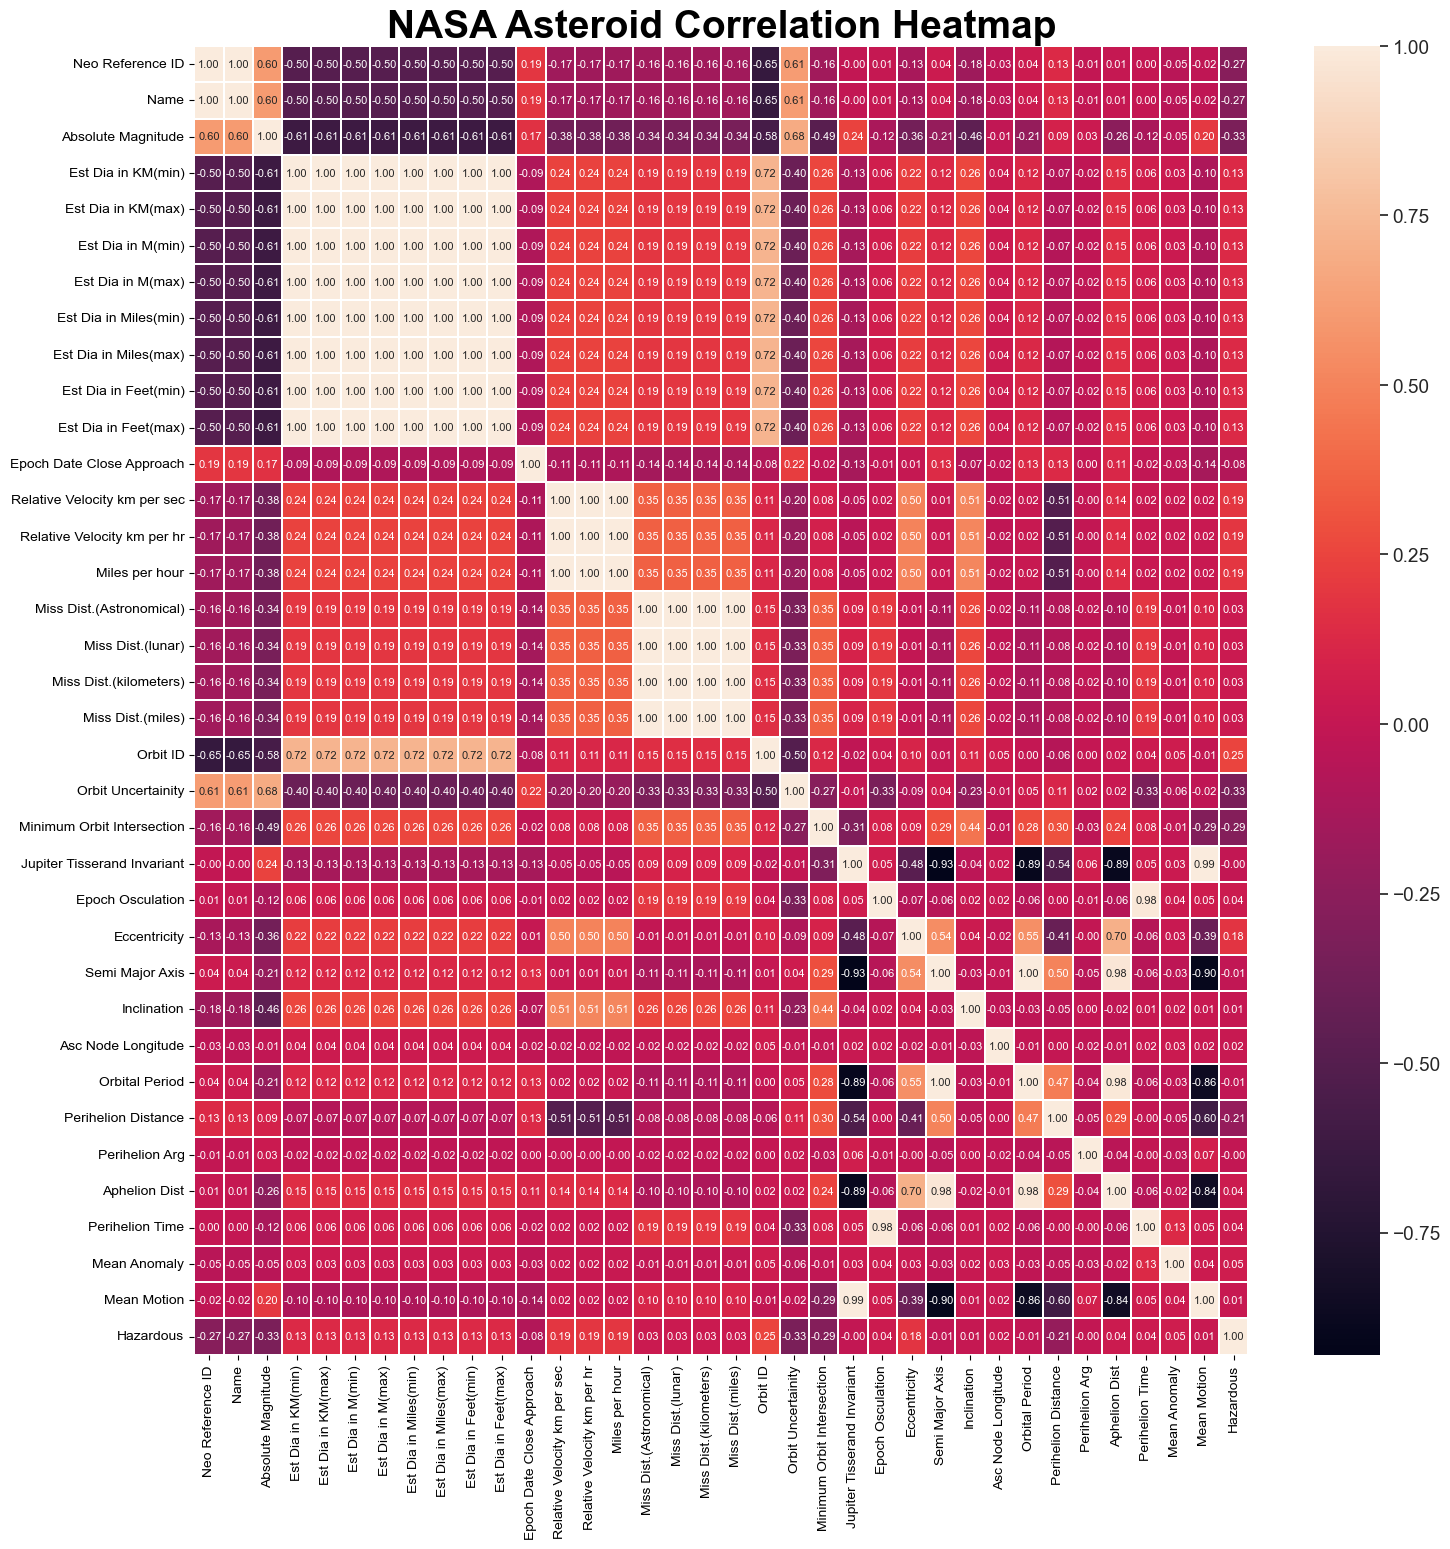

In [8]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
nasa_corr = nasa[['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous']].corr()


fig, ax = plt.subplots(figsize=(17,17))
ax.set_ylim([0,40])

for text in ax.texts:
    text.set_weight('bold')

sns.set(font_scale= 1.25)
sns.heatmap(nasa_corr, xticklabels=1, yticklabels=1, annot=True, annot_kws={"fontsize":8}, linewidths = .2, ax=ax, fmt=".2f")

plt.title("NASA Asteroid Correlation Heatmap", fontsize= 28, weight="bold")   

plt.savefig('nasa_heatmap.png')

plt.show()


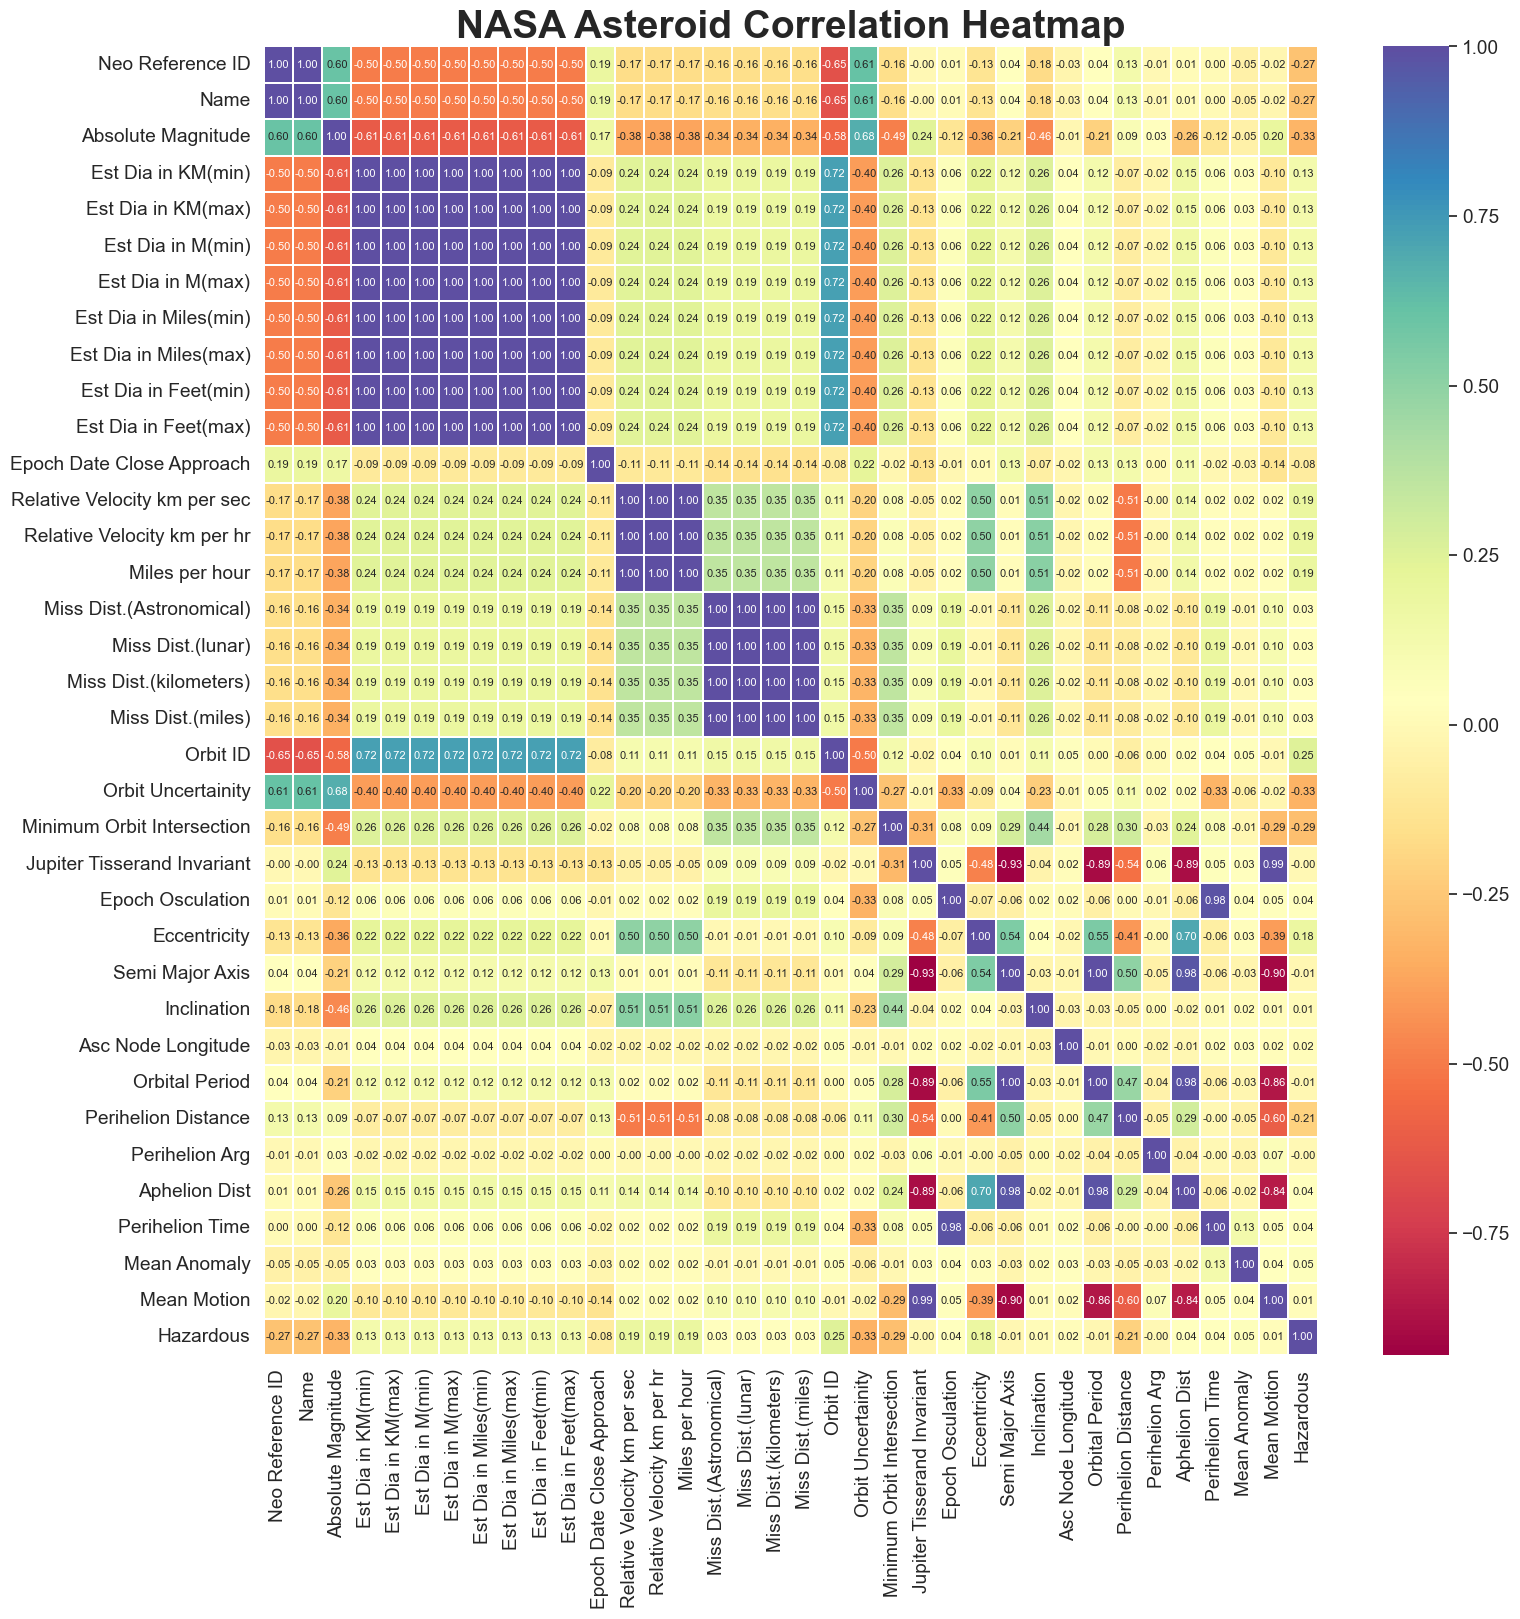

In [9]:
fig, ax = plt.subplots(figsize=(17,17))
ax.set_ylim([0,40])

for text in ax.texts:
    text.set_weight('bold')

sns.set(font_scale= 1.25)
sns.heatmap(nasa_corr, cmap ='Spectral', xticklabels=1, yticklabels=1, annot=True, annot_kws={"fontsize":8}, linewidths = .2, ax=ax, fmt=".2f")

plt.title("NASA Asteroid Correlation Heatmap", fontsize= 28, weight="bold")   

plt.savefig('nasa_heatmap_spectral.jpg')

plt.show()


**Also, the "lower-left triangle" and the "upper-right triangle" are mirror images of each other, so it is visually clearer to remove the upper-right one. This can be simply accomplished using "mask".**

In [ ]:
fig, ax = plt.subplots(figsize=(17,17))
ax.set_ylim([0,40])

# a mask is used to cover up the redundant, confusing half
mask = np.triu(np.ones_like(nasa_corr, dtype=bool))

sns.set(font_scale= 1.25)
sns.heatmap(nasa_corr, cmap="coolwarm", xticklabels=1, yticklabels=1, annot=True, annot_kws={"fontsize":8}, 
            mask=mask, center=0, square= True, linewidths = .2, ax=ax, fmt=".2f")

for text in ax.texts:
    text.set_weight('bold')
    
plt.title("NASA Asteroid Correlation Heatmap", fontsize= 30, weight="bold")   

# save plot
plt.savefig('nasa_heatmap_half.jpg')

plt.show()

### Correlation Matrix Analysis

**The correlation heatmap provides the following insights: a positive correlation means that there is a positive relationship between two data features, and a negative relationship indicates a negative relationship between two data features. It also can be used to identify outliers and whether or not colinearity happens.The sns heatmap did not provide any correlation in these 4 columns: *Close Approach Date*, *Orbiting Body*, *Orbit Determination Date* as well as *Equinox*, this is due to the fact those 4 features are object datatype, not numerical datatype, suggesting we can EITHER eliminate those features if they are uncorrelated, or CONVERT THEM using `sklearn.preprocessing import OneHotEncoder`**. 

**During this step, we will first have to separate the 4 object data features into data-type features vs. categorical features, where the data-type features are *Closing Approach Date* and *Orbit Determination Date*, and categorical feature are *Orbiting Body* and *Equinox***.

In [ ]:
# Display the categorical attributes
print(Fore.BLACK+ Back.WHITE + "Categorical Features:",Style.RESET_ALL)
print(nasa.select_dtypes(include=['object']).columns)

#https://pypi.org/project/colorama/

In [ ]:
# check columns for below categorical data features, Orbiting Body also has one label whcih is Earth, and Equinox only has J2000
nasa.loc[:, ['Orbiting Body', 'Equinox']].head()

In [ ]:
#check columns for the remaining two categorical data features.
nasa.loc[:, ['Close Approach Date', 'Orbit Determination Date']].head()

In [ ]:
# We define date columns and categorical columns 
date_cols = ['Close Approach Date', 'Orbit Determination Date']
category_cols = ['Orbiting Body', 'Equinox']

In [ ]:
# Dates Normalzation process: convert date_cols to nanoseconds
import calendar
from datetime import datetime
from numpy import int64

#Pandas cannot convert datetimes to int32, so raised error. If convert to np.int64 it working, also working convert numpy array converted to int with wrong values or convert to int64 
#- then get datetimes in native format in nanoseconds 10^9:
for col in date_cols:
    nasa[col] = pd.to_datetime(nasa[col]).astype(int64)/(10**9)
    
#https://stackoverflow.com/questions/56307152/python-3-typeerror-cannot-astype-a-datetimelike-from-datetime64ns-to-int
#https://stackoverflow.com/questions/56986205/nameerror-name-int64-is-not-defined

In [ ]:
# One Hot Encoder Method: this step is optional but I implemented anyway for practice purpose
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_encoded = cat_encoder.fit_transform(nasa[category_cols]).toarray()
#cat_encoded

# We convert numpy array to a Pandas dataframe, this is because Pandas is more robust of performing complex
# operations like group by, multi-level,etc in addition to the functionalities from NumPy. Numpy Arrays has more limited capacities.
cat_encoded_pd = pd.DataFrame(cat_encoded, columns=cat_encoder.get_feature_names_out(category_cols))

# Since we have noticed from the RAW Dataset that both features only has 1 label type across all data entries, we can omit these two.
#aka the category_cols
nasa_cat_dropped = nasa.drop(category_cols, axis=1)

#Reference:
#1. AurelienGeron . 2019. Hands On Machine Learning with Scikit Learn, Keras , and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd.ed.). O'Reilly Media, Inc. p.65-67.
#2. https://www.knowledgehut.com/blog/data-science/pandas-vs-numpy

In [ ]:
# Combine encoded categorical features with the rest of the dataset
encoded_nasa = pd.concat([nasa_cat_dropped, cat_encoded_pd], axis=1)
encoded_nasa

In [ ]:
# Check current data features in new encoded NASA dataset:
encoded_nasa.columns

In [ ]:
len(encoded_nasa.columns) # retain the equal number of data features as the original dataset

**Notice from above columns, 
'Est Dia in KM(min)','Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
'Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)' refer to the same Estimated Diameter of the Asteroid but in different units. Since NASA uses metric system, we will keep 'Est Dia in M(min)', 'Est Dia in M(max)', and drop the other 4 data features.In addition, we can also drop 'Orbiting Body_Earth', 'Equinox_J2000' drop 'Orbiting Body_Earth', 'Equinox_J2000', since all the column values have the value of 1, we remove constant features.**


In [ ]:
nasa_dropped = encoded_nasa.drop(['Est Dia in KM(min)','Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)','Orbiting Body_Earth', 'Equinox_J2000'], axis=1 )
#nasa_dropped.info()

In [ ]:
nasa_dropped.columns

In [ ]:
len(nasa_dropped.columns) # updated columns # in a new dataframe

## Feature Selection

Now we need to only retain features in the dataframe that actually help with the machine learning model. We first use Correlation Matrix and check whether Multicollineartiy exists. A good indicator of multicollinearity is the variance inflation factor(VIF). According to article #3, we should remove constant features, Quasi-Constant features as well as duplicated features, an example of Quasi-Constant features will be the data_cols, aka 'Close Approach Date' and 'Orbit Determination Date', hence we can drop them.


1. https://www.statology.org/multicollinearity-in-python/#:~:text=The%20most%20straightforward%20way%20to,between%201%20and%20positive%20infinity.
2.https://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6
3. https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
4. https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python


In [ ]:
#check dates format of date_cols
encoded_nasa.loc[:, ['Close Approach Date', 'Orbit Determination Date']].tail(5)

In [ ]:
nasa_dropped_new = nasa_dropped.drop(['Neo Reference ID','Close Approach Date', 'Orbit Determination Date','Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)','Relative Velocity km per hr'], axis=1)

In [ ]:
len(nasa_dropped_new.columns)

In [ ]:
# SelectKBest method used to evaluate most important features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif # for classification

#filter out our Hazardous variblae(Target variable)
X = nasa_dropped_new[[val for val in nasa_dropped_new.columns if val !='Hazardous']]
y = nasa_dropped_new['Hazardous']

#nasa_dropped_new.head()

# Create a function that takes in X,y variables, with criteria, and returns a dataframe with most important columns
# based on criteria

def featureSelect_dataframe(X,y, criteria, k):
    # Create the function method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    # transform after creating the function method
    X_transformed = reg.transform(X)
    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]    
    return X

# chi2 method: Chi-squared stats of non-negative features for classification tasks.
New_X = featureSelect_dataframe(X,y, chi2, 10)
New_X


#Reference:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#https://enjoymachinelearning.com/blog/feature-selection-selectkbest-sklearn/

In [ ]:
# f_classif method: ANOVA F-value between label/feature for classification tasks
New_X = featureSelect_dataframe(X, y, f_classif, 10)
New_X


In [ ]:
# mutual_info_classif method: Mutual information for a discrete target.
New_X = featureSelect_dataframe(X, y, mutual_info_classif, 10)
New_X
    